# 🌌 The Hitchiker's Guide to the Galaxy of Reinforcement Learning 🌌


### What is Reinforcement Learning ?

Reinforcement Learning is an area of machine learning that helps someone or _something_ to make decisions that lead to maximizing a given reward. The best way to picture this would be to think of scenario where you are teaching your dog new tricks. You give the dog a treat on successfully following your command, from the dog's perspective it's goal is to recieve the maximum number of treats. So it eventually learns to repeat the behavior that led it to get the most treats. This is the crux of Reinforcement Learning, an **_agent_**  (the dog) learning behaviors that lead to maximizing the rewards it recieves from the **_environment_** (you)


This notebook is intended to be a guide for beginners in Reinforcement Learning (RL). It introduces the basic ideas of RL, how deep learning fits into the world of RL, and most importantly it teaches how to train a deep neural network to balance a stick on a cart 😛 . Here's what you will be seeing : 

### 1. Background
        1. Markov Decision Processes
        2. Cumulative Returns
        3. The policy function
        4. Value functions and Action-Value functions

### 2. Deep Q Learning
        1. The Cartpole Environment
        2. The Policy Net
        3. The Target Net
        4. Experience Replay Memory
        5. Exploration vs Exploitation
        6. The Agent
        7. Weights and Biases and Why it's awesome
        8. The DQN training algorithm
        
### 3. Extending DQNs beyond CartPole
        1. The Breakout environment
        2. Training on the breakout environment

# Background


## Markov Decision Processes
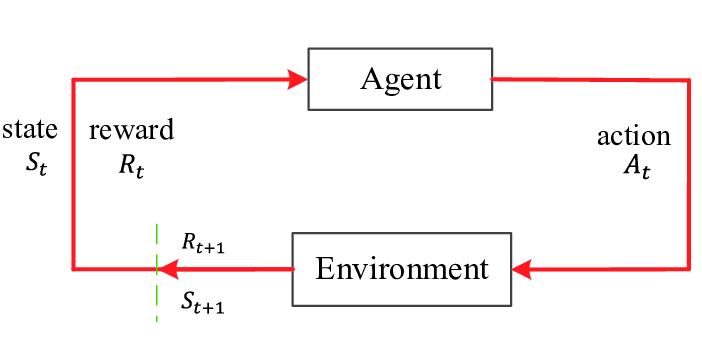

Markov Decision Processes are a framework to mathematically define how our agent interacts with it's environment.
Here, we assume that our _agent_ interacts with our _environment_ in a sequential manner over time. At every timestep ($t$), the _agent_ recieves a representation of the _environment's_ state ($S_t$). The agent then proceeds to interact with the _environment_ through an _action_ ($A_t$). The _environment_ then proceeds to transition to it's next state ($S_{t+1}$) granting the _agent_ a reward ($R_{t+1}$). This process repeats it self for the next time step ($t+1$).

We can think of the reward giving process as an arbitrary function ($f$) that maps a state ($S_t$), and, an action ($A_t$) to a reward ($R_{t+1}$).

$$f(S_t, A_t) = R_{t+1}$$

Let $S$ be the set of all possible states the environment can be in, and, $A$ be the set of all possible actions the agent can take. Assuming both $S$ and $R$ are finite, we can think of $R_t$ and $S_t$ to be random variables, with well defined probabilities that depend on the previous _state-action pair_ ($S_{t-1}, R_{t-1}$). 

## Cumulative Returns 

The goal of our agent is to maximize the cumulative rewards, also called as the expected return. You can picture it as the sum of all future rewards it recieves from any given time step ($t$) till the final time step of the process ($T$). Let's denote this with $G_t$
$$G_t = R_t + R_{t+1} +  R_{t+2} ... R_{T}$$
$$G_t = \sum_{k=t}^{T} R_k$$

When a process has a final time step $T$, it naturally can be broken down into finite subsequences called _episodes_. For example, a game of pong has multiple rounds. Each round can be thought of as an _episode_ with the final time step happening when one player loses the round. However, not all tasks have final timesteps. For example, a factory robot painting cars. These kind of tasks are called continuing tasks, make our definition of expected return obselete as it grows to become $\infty$ because $T=\infty$.

We can however create a new definition of expected return by _discounting_ the future rewards. We can progressively weigh future lower and lower so our expected return stays finite. We call this weighing term _discount rate_ denoted by ($\gamma$). The expected return is now called _discounted return_ and our agent's goal is to maximize this.

$$G_t = R_t + \gamma R_{t+1} +  \gamma^{2} R_{t+2} ... $$
$$G_t = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}$$
$$G_t = R_t + \gamma G_{t+1}$$

The key takeway from the idea of the discounted return is that our agent now cares more about the immediate rewards than it does about the future rewards. This term helps us choose the trade off between short term rewards and long term rewards.

## The Policy Function

A policy function maps the probability of our agent picking a certain action ($a$), given it has observed a state ($s$) to a probabilty distribution. We can donate this by $\pi$. Following a policy $\pi$ means picking the action that yields the maximum probability. The optimal policy function always yeilds the highest probabilty to the action that yields the maximum discounted return. We can denote the optimal policy using $\pi^{*}$ 

## Value functions and Value-Action Functions

Value and Value-Action functions are functions that map the expected discounted return of a state or a state-action pair. What this means intuitively is that a value / value-action can tell the agent how good a specific state or state action pair is from the agent's perspective were it to follow a policy $\pi$.

Mathematically, the value function of a state ($s$) under a policy $\pi$ can be defined as follows
$$V_{\pi}(s) = E[G_t | s]$$
$$V_{\pi}(s) = E[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1} | S_t = s]$$

Similarly, Value-Action function, often called as the **Q-value** function can be defined as follows
$$Q_{\pi}(s, a) = E[G_t | s]$$
$$Q_{\pi}(s, a) = E[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1}| S_t = s, A_t = a]$$

The goal of reinforcement learning is to estimate these value functions, inorder to determine the best actions the agent can take.


# Deep Q Learning

Recall that the optimal policy ($\pi^{*}$) always assigns the highest probability to the action that yields the best expected discounted returns. So, any other policy ($\pi$) can said to be optimal if and only if it yeilds better discounted returns for all states.

$$\pi \geq \pi^{*} \text{      if and only if     } v_{\pi}(s) \geq v_{\pi^{*}}(s) \forall s \epsilon S$$

We know that the goal of Reinforcement Learning is to estimate the value functions. What is best way to approximate a function ? Neural Nets !. This is where Deep Learning fits in the realm of Reinforcement Learning. Only the optimal q function similarly returns the largest q value for all state action pairs.Therefore, it follows something called the **Bellman Optimality Equation**

$$ Q_{*}(s, a) = E[ R_{t+1} + \gamma \max_{a'}Q_{*}(s', a') ] $$

What this means is that the optimal q value for any state-action pair is the expectation of the reward recieved from the said state-action pair plus the optimal Q value achieved from any possible next state-action pairs.

For any Q function $Q(s, a)$ to become the optimal Q function $Q_{*}(s, a)$, it has to follow the Bellman equation as well. Our neural network might not do so at the beginning, so inorder to train the network all we have to do is minimize the loss between the Q-value it should be returning were it to follow the bellman optimality equation vs the value it actually returns. We can use the MSE function between these two terms in order to make sure we don't over / undershoot the required values.  

$$loss = MSE|Q(s, a) -  (R_{t+1} + \gamma \max_{a'}Q(s', a'))|$$

Now that we understand the basic idea of how deep q learning actually works, let's get started with a basic example. Let's get started with importing all the libraries we will be needing

In [1]:
%matplotlib inline
import os
import gym
import math
import random
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
import wandb

## The Cartpole Environment

We will be using Open-AI [gym](https://gym.openai.com/) and [PyTorch](https://pytorch.org/) for our experiments. _Gym_ is an open source simulator for a variety of relatively simple and intuitive tasks like the Atari games. We will be working with the 'CartPole-v0' environment, where we teach our agent how to balance a pole that is is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by moving the cart left / right, and our agent's goal is to hold the stick upright for as long as possible.

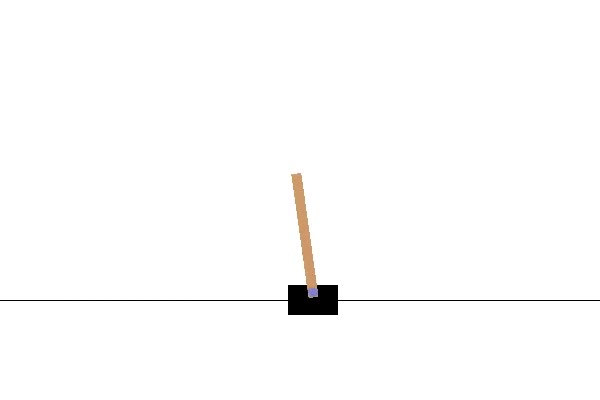 

Here I created a wrapper class on top of the gym's environment that does some preprocessing to help us use it with an actuall neural network. I chose to make the state of the robot, the difference in pixels of the simulator's rendering between two consecutive actions. The starting and ending states of the simulation are just black windows with nothing in them. Mainly, it has 5 functions that we really need for creating the MDP loop. 

    1. reset()
    2. take_action(action)
    3. get_state()
    4. get_screen_height()
    5. get_screen_width()
    
The reset function resets the environment to it's starting state. This is called after every episode of task ends. The take_action function takes in an action as the input and it passes it on to the environment, it returns the reward recieved by doing that action. The get_state function returns the preprocessed state of the environment at any given moment. The preprocessing is required inorder to pass it to our Neural Network. We first crop the rendered output from env, then resize to a size of (40, 90) to make the computations easier and then take the difference between the previous state and the current state, then proceed to return it. This makes it easier for the network to learn the changes between the states. The get_screen_height, get_screen_width functions return the height, and, width of the preprocessed state. 

In [2]:
class CartPoleEnvManager():
    def __init__(self, device):
        self.device = device # to keep track of which device to put our tensors on
        self.env    = gym.make('CartPole-v0').unwrapped # to create the environment
        self.env.theta_threshold_radians = 160 * 2 * math.pi / 360
        self.env.reset()
        self.current_screen = None # use this to keep track of our current state
        self.done           = False # use this to keep track of wether we're in the terminal state or not
        
    def reset(self):
        # reset the env 
        self.env.reset()
        self.current_screen = None
        
    def close(self):
        self.env.close()
        
    def render(self, mode='human'):
        return self.env.render(mode) # to display the environment's state
        
    def num_actions_available(self):
        return self.env.action_space.n
        
    def take_action(self, action):
        # obs is state in a vector format, it is harder to make sense of, and, visualize 
        # so we choose rendered screen instead
        # info is additional information about the env, it is of no use to us right now
        # done returns True if it the returned state is a terminal state
        # reward is the reward the environment grants
        
        observation, reward, self.done, info = self.env.step(action.item()) # perform an action on the env
        return torch.tensor([reward], device=self.device)
    
    def just_starting(self):
        return self.current_screen is None
    
    def get_state(self):
        # return a blank screen at the beginning / end of the simulation
        if self.just_starting() or self.done:
            self.current_screen = self.get_processed_screen()
            black_screen        = torch.zeros_like(self.current_screen)
            return black_screen
        # return the pixel difference between consecutive states other wise
        else:
            s1 = self.current_screen
            s2 = self.get_processed_screen()
            self.current_screen = s2
            return s2 - s1
    
    def get_screen_height(self):
        screen = self.get_processed_screen()
        return screen.shape[2]
    
    def get_screen_width(self):
        screen = self.get_processed_screen()
        return screen.shape[3]
       
    def get_processed_screen(self):
        screen = self.render('rgb_array').transpose((2, 0, 1)) # PyTorch expects CHW for conv layers
        screen = self.crop_screen(screen) # crop the screen so it removes borders and other useless pixels
        return self.transform_screen_data(screen) # preprocess the rendered image
    
    def crop_screen(self, screen):
        screen_height = screen.shape[1]
        
        # Strip off top and bottom
        top    = int(screen_height * 0.4)
        bottom = int(screen_height * 0.8)
        screen = screen[:, top:bottom, :]
        return screen
    
    def transform_screen_data(self, screen):       
        # Convert to float, rescale, convert to tensor
        screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
        screen = torch.from_numpy(screen)
        
        # Use torchvision package to compose image transforms
        resize = T.Compose([
            T.ToPILImage(), # to convert it to the right format
            T.Resize((40,90)), # to resize the image as needed
            T.ToTensor() # to convert it to a tensor for our NN
        ])
        
        return resize(screen).unsqueeze(0).to(self.device) # add a batch dimension (BCHW) for pytorch

## The Policy Network

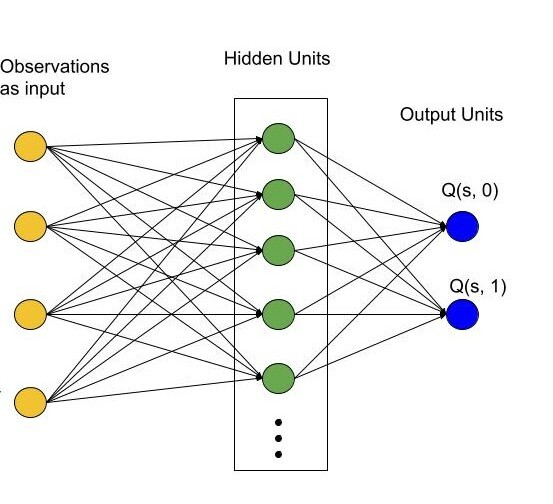

The network takes a state as an input and produces the Q values for that state for every action the agent can take. We can quickly see how this network maps a state to the actions taken by our agent. Hence, the name **Policy Network**. 

The Multi Layer Perceptron is quite sufficient for our example. We know the input to the network is the state of the environment, and our state is the rendered pixel difference between consecutive states. We flatten this state and pass it through the network. Therefore the first layer should have the input size same as the flattened vector's dimensions. Our environment has two possible actions, so it should have 2 output features. 

In [3]:
class CartPoleDQN(nn.Module):
    def __init__(self, img_height, img_width):
        super().__init__()
         
        self.fc1 = nn.Linear(in_features=img_height*img_width*3, out_features=24)   
        self.fc2 = nn.Linear(in_features=24, out_features=32)
        self.out = nn.Linear(in_features=32, out_features=2)            

    def forward(self, t):
        t = t.flatten(start_dim=1)
        t = F.relu(self.fc1(t))
        t = F.relu(self.fc2(t))
        t = self.out(t)
        return t

## The Target Network

Recall the loss function we use in Deep Q Learning
$$loss = MSE|Q(s, a) -  (R_{t+1} + \gamma \max_{a'}Q(s', a'))|$$

$Q(s, a)$ is the Q value of state and action pair at time step $t$ predicted by our policy net. The $\max_{a'}Q(s', a')$ is the maximum Q value for all the actions possible from the next state. We get this by passing the next state to our policy net and taking the maximum value from it. However, it seems a bit odd as it looks like our network is trying to predict it's own output. It infact feels like reaching a target that's moving with us. That is infact the case, therefore the network becomes quite unstable and any wrong prediction in Q value at one step is propogated through out the entire training process. To avoid this we use a separate neural network called the **Target Network** to predict the value of $\max_{a'}Q(s', a')$. If we use a fixed target network, our Q value will stop getting better over time. So what we can do is maintain a copy of the polciy network and after few time steps, we can update our target network with the weights of the policy network. This ensures that our Q values will get better over time, while not moving the target along with use at the same time. So all in all the new loss function now becomes:

$$loss = MSE|Q_{Policy}(s, a) -  (R_{t+1} + \gamma \max_{a'}Q_{Target}(s', a'))|$$

We will further refine this idea later on when we walk through the code as were calculating the loss on predictions from the same function.

## Experience Replay Memory

There are two problems that arise if we were to train our network continously on a stream of states and actions as they arrive:
    
    1. Each consecutive training sample is highly correlated with the previous one, so the network overfits to 
    the samples as they arrive. The network will forget about the previous states and their rewards and fail to 
    fit properly. For example, when studying for a test if you were to memorize the order of correct options instead of the actual answers, you will find yourself in hot waters if the order of the questions were changed in the actual exam. Somthing very similar happens here as well 
    
    2. We would be throwing away all our samples after using them once, this is not an effective startegy for        training.
    
To mitigate these issues, the experience replay buffer was introduced. The key idea is that we store all our experiences in a large buffer and randomly sample from it to train our network. This ensures that we are infact not learning from correlations between consecutive samples, but from the actual experience it self. 

We call the state-action pair, the next state it transitioned to, the reward it recieved for the state-action pair, and the information about the state being terminal or not an _"Experience"_. So to store experiences, I built a named tuple that stores these field.

The experience replay memory is just a queue that holds a fixed number of experiences. Once it gets full, it pushes out the oldest experiences it has accumulated. 

In [4]:
Experience = namedtuple(
    'Experience',
    ('state', 'action', 'next_state', 'reward', 'terminal')
)

class ReplayMemory():
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.push_count = 0
        
    def push(self, experience):
        if len(self.memory) < self.capacity:
            self.memory.append(experience)
        else:
            self.memory[self.push_count % self.capacity] = experience
        self.push_count += 1

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)
    
    def can_provide_sample(self, sample_size):
        return len(self.memory) >= sample_size

## Exploration vs Exploitation

Recall that our agent makes greedy choices by always choosing the action that yields the highest Q value. This is called **Exploitation**, where in our agent uses the knowledge it has learned over time to pick the best action. However, if we were to always exploit our knowledge of the environment, i.e choose the greedy action always we can never find out that some actions are better than others. The agent should occasionally pick some random actions to see what kind of returns it can get us, this is called **Exploration** of the environment. The trade off between exploration and exploitation is a delicate balance, explore too much and we won't be making the optimal choices; At the same time exploting too much won't let us understand the true impact of taking an action. In order to combat this, the $\epsilon$-greedy policy is introduced. This policy behaves greedy most of the time, but chooses random actions with a probability of $\epsilon$. One thing to note is that, our agent will get better over time. So it can start heavily exploring the environment at first, start exploiting it more and more as it gets better. This is done by gradually decaying the value of $\epsilon$ over time. Testing our agent, is going to be just following the greedy policy where in we pick the actions that have the largest Q values.

In [5]:
class EpsilonGreedyStrategy():
    def __init__(self, start, end, decay):
        self.start = start
        self.end = end
        self.decay = decay
    
    def get_exploration_rate(self, current_step):
        
        # exponentially decay the epsilon value with every time step
        return self.end + (self.start - self.end) * \
            math.exp(-1. * current_step * self.decay)

## The Agent

Building our agent is quite simple. It needs a exploration-exploitation strategy to follow while training. So Here we pass our $\epsilon$-greedy strategy to it. It can keep track of how many steps it has taken, which helps it retrieve the right $\epsilon$ value. selecting the action requires the policy net and the state the environment is in.  

In [6]:
class Agent():
    def __init__(self, strategy, num_actions, device):
        self.current_step = 0
        self.strategy = strategy
        self.num_actions = num_actions
        self.device = device

    def select_action(self, state, policy_net):
        
        rate = strategy.get_exploration_rate(self.current_step)
        self.current_step += 1
        if rate > random.random():
            action = random.randrange(self.num_actions)
            return torch.tensor([action]).to(self.device) # explore      
        else:
            with torch.no_grad(): # no grad to save gpu memory, since there wont be backprop through this
                return policy_net(state).argmax(dim=1).to(self.device) # exploit
    
    def test_agent(self, em, policy_net):
        em.reset()
        state = em.get_state()
        frames = [em.render('rgb_array')] # keep track of frames to visualize the testing results
        total_reward = 0 # keep track of cumulative reward the agent recieves

        for timestep in count():
            with torch.no_grad():
                action = policy_net(state).argmax(dim=1) # exploit 
            reward = em.take_action(action)
            state = em.get_state()
            frames.append(em.render('rgb_array'))
            total_reward += reward.item()
            if em.done or timestep > 1500:
                break

        em.close()
        
        return np.array(frames).transpose(0, 3, 1, 2), total_reward

## Weights & Biases

Weights & Biases is a tool to track, compare, and visualize our training results with ease. We can log all the metrics or values we need to log and visualize them on our personalized dashboard on their website. As a Deep Learning Researcher, I constantly found myself have to write a multitude of helper functions to keep track of, and organize the data from my experiment until I came across this. W&B made my life easier my allowing me to track my metrics on the go (especially on my phone), from wherever I am. Weights & Biases calls every different experiment a __run__, we can attach the configurations of our experiments to the run to track our experiments. We'll be using it to log all our metrics, test videos, and then create a report using it that summarizes our findings.

In [7]:
# login to weights and biases, I personally prefer github to login
os.environ['WANDB_NOTEBOOK_NAME'] = 'DeepQLearning.ipynb' # set the name of the notebook
wandb.login()

# set up the run configuration with all our HyperParameters, so we can look over different runs later
config = dict(
    batch_size         = 256,   # Mini batch size of training examples
    eps_start          = 1,     # Starting value of epsilon
    eps_end            = 0.01,  # Ending value of epsilon
    eps_decay          = 0.001, # Decay rate of epsilon
    gamma              = 0.99, # Discount factor
    learning_rate      = 0.001, # Learning rate for our optimizer
    episodes           = 1000,  # Number of episodes to run the training process for
    sync_time          = 10,    # Number of episodes between synchronizing target and policy nets
    replay_buffer_size = 10000, # Size of the replay memory  
    warm_start         = 256,   # Number of entries in buffer before start training our model
    max_test_length    = 1500,  # Maximum timesteps for testing our agent
    fps                = 10,    # The frame rate to save our videos in
    test_freq          = 10,    # Number of episodes to wait until testing our model
    save_freq          = 100,   # Number of episodes to save our model
    learn_start        = 0      # Number of timesteps to wait before we start training our model
)

# initialize wandb
run             = wandb.init(project='Hitchiker-s-Guide-to-the-Galaxy-of-Reinforcement-Learning', config=config)
artifact        = wandb.Artifact('policy_net', type='model') # we use the artifacts API to keep track of the model, it's checkpoints
device          = torch.device("cuda" if torch.cuda.is_available() else "cpu")

run_videos      = os.path.join((str(run.name)))
run_checkpoints = os.path.join(run_videos, 'ckpt')

# make a new folder to save checkpoints locally, as a back up
if not os.path.isdir(run_checkpoints):
    os.makedirs(run_checkpoints)

wandb: Currently logged in as: peacekurella (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.23 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


## The DQN training algorithm

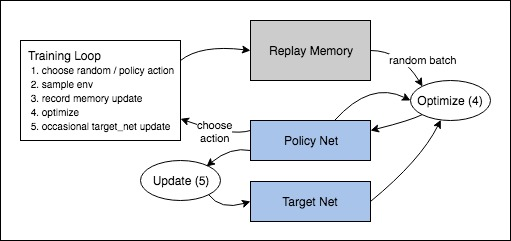

Now that we've seen all the pieces that make up the DQN training algorithm, let's put it all together.

    Initialize the Replay Memory with the desired capacity
    Initialize the Agent with the desired exploitation-exploration strategy
    Initialize our environments
    Initialize the policy and target networks
    Synchronize Policy and target networks
    Put the target net in evaluation mode inorder to prevent accidentally updating weights / saving gpu memory

    for episode 1 to M
        
        reset environment
        state <- starting state
        
        do while not terminal state
            
            select action(state)
            perform action(state, policy_net)
            recieve next state
            recieve next reward
            recieve information about terminal state
            create experience(current_state, action, reward, next_state, terminal)
            push experience to replay buffer
            update state to become the next state
            
            if buffer has enough elements to start training 
                sample experiences
                get Qp(s, a) value for the batch
                get Max Qt(s', a') value for the batch
                calculate MSEloss(Qp(s, a), (reward + gamma * Max Qt(s', a')))
                backprop on loss and update weights for policy net
        
        if time to sync
            sync policy and target net
        
        if time to test
            test agent with policy
        
        if time to save
            save policy network
            

There are quite few implementation details that the above algorithm has skipped. Let's go over them:

#### How to get the Qp(s, a) values ?
Passing the batch_size number of states to the policy net yields and output of shape (batch_size, num_actions). We would then like to recieve the corresponding q values of the batch of actions from this output vector. Torch has a function called gather that does this for us, it requires 2 arguments. The dim argument tells it to get the value of the dimension that is required. In our case that is the num_actions's dimension (so dim=1). The second argument is index, it expects a (batch_size, 1) vector that tells it which corresponding action's Q value to pick out. Doing this operation yields us a vector of size(batch_size, 1)

#### How to get the Qt(s', a') values ?
This is a little complicated. So I will break it down into three steps, but before that we have to recall that the Q values for terminal states are zeroes. So in order to satisfy this requirement we do the following:
    
    1. Locate all the states that are non terminal, we can use the is_terminal variable to mask out all the terminal states in the batch.
    2. Create a zero tensor in the shape of (batch_size) this will be our vector that contains the corresponding Max Qt(s', a') values
    3. For all the non terminal states in the zero tensor, fill them up with the q-value predictions from our target network

In [8]:
class Utils():
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    @staticmethod
    def get_current(policy_net, states, actions):
        return policy_net(states).gather(dim=1, index=actions.unsqueeze(-1)) # select the q values of all the actions
    
    @staticmethod        
    def get_next(target_net, next_states, terminal):
        
        with torch.no_grad(): # no grad required here because this is not part of back prop
            non_final_states  = next_states[~terminal] # get all non terminal states
            batch_size        = next_states.shape[0]   # get the batch size
            values            = torch.zeros(batch_size).to(device) # create a zero value tensor 
            values[~terminal] = target_net(non_final_states).max(dim=1)[0].detach() # replace zeros with Q values 

        return values
    
    @staticmethod
    def extract_tensors(experiences):
        
        # Convert batch of Experiences to Experience of batches
        batch = Experience(*zip(*experiences))
        # 1. unroll to seperate into individual elements
        # 2. zip to form into tuple of states, rewards ..
        # 3. unroll into seperate elements
        # 4. create the final experience tuple 

        if torch.is_tensor(batch.state[0]): # if already a tensor, batch them
            t1 = torch.cat(batch.state).to(device)
            t4 = torch.cat(batch.next_state).to(device)
        else: # convert to tensors, this is useful for other environments like the breakout one
            t1 = np.array([np.array(st).transpose(2, 0, 1) for st in batch.state])
            t1 = torch.from_numpy(t1).to(device) / 255
            t4 = np.array([np.array(st).transpose(2, 0, 1) for st in batch.next_state])
            t4 = torch.from_numpy(t4).to(device) / 255


        t2 = torch.cat(batch.action).to(device)
        t3 = torch.cat(batch.reward).to(device)
        t5 = torch.cat(batch.terminal).to(device)

        return (t1,t2,t3,t4,t5)

In [ ]:
em       = CartPoleEnvManager(device)
tem      = CartPoleEnvManager(device)

strategy = EpsilonGreedyStrategy(config['eps_start'], config['eps_end'], config['eps_decay'])
agent    = Agent(strategy, em.num_actions_available(), device)
memory   = ReplayMemory(config['replay_buffer_size'])

policy_net = CartPoleDQN(em.get_screen_height(), em.get_screen_width()).to(device)
target_net = CartPoleDQN(em.get_screen_height(), em.get_screen_width()).to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.Adam(params=policy_net.parameters(), lr=config['learning_rate'])
loss_fn   = nn.MSELoss(reduction='mean')


# run over all the episodes 
for episode in range(1, config['episodes'] + 1):

    em.reset()
    state          = em.get_state()
    episode_reward = 0
    episode_loss   = [0]

    for timestep in count():

        action = agent.select_action(state, policy_net)
        reward = em.take_action(action)
        next_state = em.get_state()
        memory.push(Experience(state, action, next_state, reward, torch.tensor([em.done])))
        state = next_state
        episode_reward += reward.item()

        if memory.can_provide_sample(config['warm_start']) and timestep > config['learn_start']:

            experiences = memory.sample(config['batch_size'])
            states, actions, rewards, next_states, terminal = Utils.extract_tensors(experiences)

            current_q_values = Utils.get_current(policy_net, states, actions)
            next_q_values = Utils.get_next(target_net, next_states, terminal)
            target_q_values = (next_q_values * config['gamma']) + rewards
            loss = loss_fn(current_q_values, target_q_values.unsqueeze(1).float()) # unsqueeze to match shapes, float to match dtypes
            episode_loss += [loss.detach().item()]
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


        if em.done:
            run.log({
                'Train/EpisodeReward' : episode_reward,
                'Train/EpisodeDuration': timestep,
                'Train/EpisodeLoss': sum(episode_loss) / len(episode_loss)
            }, step = episode)
            break
    
    # periodically sync the target and policy networks
    if episode % config['sync_time'] == 0:
        target_net.load_state_dict(policy_net.state_dict())

    # periodically test the model and save the episode videos
    if episode % config['test_freq'] == 0:

        # test the agent
        frames, total_reward = agent.test_agent(tem, policy_net)

        # expects the video to be of shape (t, c, h, w)
        video = wandb.Video(
            frames,
            fps=config['fps'],
            caption = str(episode),
            format='mp4'
        )

        # log the video and reward
        run.log({
            'Test/Video' : video,
            'Test/EpisodeDuration': len(frames),
            'Test/EpisodeReward': total_reward
        }, step = episode)

    # periodically save the model weights
    if episode % config['save_freq'] == 0:

        # save locally for back up
        torch.save(policy_net.state_dict(), os.path.join(run_checkpoints, str(episode)))

        # use wandb artifact to save the model
        artifact.add_file(os.path.join(run_checkpoints, str(episode)))


# close the environment
run.log_artifact(artifact)
run.join()        
em.close()

# Testing our saved model

We can use the wandb api to download our saved model artifacts. We can then load them and test them anywhere as long as we have access to the artifact

In [ ]:
# download the latest checkpoint files 
path = 'peacekurella/Hitchiker-s-Guide-to-the-Galaxy-of-Reinforcement-Learning/policy_net:latest' 
api = wandb.Api()
artifact = api.artifact(path)
artifact.download(root='ckpts/')

latest_file = max([int(x) for x in os.listdir('ckpts/')])
latest_file = 'ckpts/' + str(latest_file)

# create a new policy net
policy_net = CartPoleDQN(tem.get_screen_height(), tem.get_screen_width()).to(device)
policy_net.load_state_dict(torch.load(latest_file))

# create a new agent and test it
agent    = Agent(strategy, em.num_actions_available(), device)
agent.test_agent(tem, policy_net)

# Extending DQNs beyond CartPole

DQNs have been succefully employed to solve various other discrete action space tasks like playing Atari Games. This section below implements the DQN from deepmind that plays atari. Note that it takes very long time to train (~ 50 Million steps). The hyperparameter defaults are taken directly from the DeepMind's paper.

In [ ]:
try:
    from stable_baselines.common.atari_wrappers import wrap_deepmind
except:
    from stable_baselines.common.atari_wrappers import wrap_deepmind

# set up the run configuration with all our HyperParameters, so we can look over different runs later
config = dict(
    batch_size         = 32,       # Mini batch size of training examples
    eps_start          = 1,        # Starting value of epsilon
    eps_end            = 0.01,     # Ending value of epsilon
    eps_decay          = 0.0001,   # Decay rate of epsilon
    gamma              = 0.99,     # Discount factor
    learning_rate      = 0.00001,  # Learning rate for our optimizer
    episodes           = 100000,   # Number of episodes to run the training process for
    sync_time          = 1000,     # Number of episodes between synchronizing target and policy nets
    replay_buffer_size = 1000000,  # Size of the replay memory  
    warm_start         = 50000,    # Number of entries in buffer before start training our model
    max_test_length    = 1500,     # Maximum timesteps for testing our agent
    fps                = 30,       # The frame rate to save our videos in
    test_freq          = 10,       # Number of episodes to wait until testing our model
    save_freq          = 100,      # Number of episodes to save our model
    learn_start        = 16        # Number of timesteps to wait before we start training our model
)

# initialize wandb
run             = wandb.init(project='Hitchiker-s-Guide-to-the-Galaxy-of-Reinforcement-Learning', config=config)
artifact        = wandb.Artifact('breakout_policy_net', type='model') # we use the artifacts API to keep track of the model, it's checkpoints
device          = torch.device("cuda" if torch.cuda.is_available() else "cpu")

run_videos      = os.path.join((str(run.name)))
run_checkpoints = os.path.join(run_videos, 'ckpt')

# make a new folder to save checkpoints locally, as a back up
if not os.path.isdir(run_checkpoints):
    os.makedirs(run_checkpoints)

## The Breakout Environment

We will be using gym's 'BreakoutDeterministic-v4' environment as our simulator, however we will be using the stable_baselines library to convert this environment into the one used by DeepMind. The crux of the additional transformations that this library does are as follows:
    
    1. Creates a stack of 4 frames as one state, this is important because a single frame cannot help the network determine the direction and velocity of the ball correctly
    2. Reshapes the frames to a size of (84, 84) and makes them grayscale for easier computations
    3. Returns the state as a 'lazy array' which doesn't consume any memory until it's loaded as a numpy array. This is important because dealing with a replay_memory of size 1000000 quickly gets exhausting

In [ ]:
class BreakoutEnvManager(CartPoleEnvManager):
    
    def __init__(self, device):
        self.device = device
        self.env = gym.make('BreakoutDeterministic-v4')
        self.env = wrap_deepmind(self.env, frame_stack = True)
        self.reset()
        self.done = False
    
    def reset(self):
        self.current_state = self.env.reset()
        
    def take_action(self, action):        
        self.current_state, reward, self.done, info = self.env.step(action.item())
        
        if self.done: # if life is lost
            reward = -1 # set reward to -1
            if info['ale.lives'] > 0: # if there lives remaining, then it's not terminal state
                self.done = False 
        
        return torch.tensor([reward], device=self.device)
    
    def get_state(self):
        return self.current_state # lazy array (84, 84, 4), only convert to tensor before passing to model
    
    def get_screen_height(self):
        return 84
    
    def get_screen_width(self):
        return 84

Here is a quick look at the state returned by the stable baselines gym environment wrapper 

In [ ]:
env = BreakoutEnvManager(device)
env.reset()
state  = np.array(env.get_state())

fig, ax = plt.subplots(1, 4, figsize=(15, 15))

for i in range(4):
    ax[i].imshow(state[:, :, i], cmap='gray')
    ax[i].title.set_text('Frame : ' + str(i))

## The Breakout Q Network

We will be using a 4 layer CNN with 2 convolutional layers, that takes in an image of dimesions (batch_size, 4, 84, 84) and returns an output vector of (batch_size, 4)

In [ ]:
class BreakoutDQN(nn.Module):
    
    def __init__(self):    
        super().__init__() # call the super class constructor
        
        self.conv1 = nn.Conv2d(4, 16, kernel_size = (8,8), stride = (4,4)) # 4 channels in, 16 channels out
        self.conv2 = nn.Conv2d(16, 32, kernel_size = (4,4), stride = (2,2)) # 16 channels in, 32 channels out
        
        self.fc1 = nn.Linear(32 * 9 * 9, 256)
        self.fc2 = nn.Linear(256, 4)
        
    def forward(self, state):
        
        if not torch.is_tensor(state):
            state = np.array([state]).transpose(0, 3, 1, 2)
            state = torch.from_numpy(state).to(device)

        out = self.conv1(state / 255.0) # pass through first conv layer
        del state
        out = F.relu(out) # apply the relu activation
        
        out = self.conv2(out) # pass through second conv layer
        out = F.relu(out) # apply the relu activation
        
        out = out.reshape(-1, 32 * 9 * 9) # flatten the conv output
        
        out = self.fc1(out) # pass through first fc layer
        out = F.relu(out) # apply the relu activation
        
        out = self.fc2(out) # pass through second fc layer
        out = F.relu(out) # apply the relu activation
        
        return out

In [ ]:
em       = BreakoutEnvManager(device)
tem      = BreakoutEnvManager(device)

strategy = EpsilonGreedyStrategy(config['eps_start'], config['eps_end'], config['eps_decay'])
agent    = Agent(strategy, em.num_actions_available(), device)
memory   = ReplayMemory(config['replay_buffer_size'])

policy_net = BreakoutDQN().to(device)
target_net = BreakoutDQN().to(device)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

optimizer = optim.Adam(params=policy_net.parameters(), lr=config['learning_rate'])
loss_fn   = nn.MSELoss(reduction='mean')


# run over all the episodes 
for episode in range(config['episodes']):

    em.reset()
    state          = em.get_state()
    episode_reward = 0
    episode_loss   = [0]

    for timestep in count():

        action = agent.select_action(state, policy_net)
        reward = em.take_action(action)
        next_state = em.get_state()
        memory.push(Experience(state, action, next_state, reward, torch.tensor([em.done])))
        state = next_state
        episode_reward += reward.item()

        if memory.can_provide_sample(config['warm_start']) and timestep > config['learn_start']:

            experiences = memory.sample(config['batch_size'])
            states, actions, rewards, next_states, terminal = Utils.extract_tensors(experiences)

            current_q_values = Utils.get_current(policy_net, states, actions)
            next_q_values = Utils.get_next(target_net, next_states, terminal)
            target_q_values = (next_q_values * config['gamma']) + rewards
            loss = loss_fn(current_q_values, target_q_values.unsqueeze(1).float()) # unsqueeze to match shapes, float to match dtypes
            episode_loss += [loss.detach().item()]
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


        if em.done:
            run.log({
                'Train/EpisodeReward' : episode_reward,
                'Train/EpisodeDuration': timestep,
                'Train/EpisodeLoss': sum(episode_loss) / len(episode_loss)
            }, step = episode)
            break
    
    # periodically sync the target and policy networks
    if episode % config['sync_time'] == 0:
        target_net.load_state_dict(policy_net.state_dict())

    # periodically test the model and save the episode videos
    if episode % config['test_freq'] == 0:

        # test the agent
        frames, total_reward = agent.test_agent(tem, policy_net)

        # expects the video to be of shape (t, c, h, w)
        video = wandb.Video(
            frames,
            fps=config['fps'],
            caption = str(episode),
            format='mp4'
        )

        # log the video and reward
        run.log({
            'Test/Video' : video,
            'Test/EpisodeDuration': len(frames),
            'Test/EpisodeReward': total_reward
        }, step = episode)

    # periodically save the model weights
    if episode % config['save_freq'] == 0:

        # save locally for back up
        torch.save(policy_net.state_dict(), os.path.join(run_checkpoints, str(episode)))

        # use wandb artifact to save the model
        artifact.add_file(os.path.join(run_checkpoints, str(episode)))

    if len(memory.memory) % 10000 == 0:
        print(len(memory.memory))
    
# close the environment
run.log_artifact(artifact)
run.join()        
em.close()

# References
    
    1. https://deeplizard.com/
    2. https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
    3. https://stable-baselines.readthedocs.io/en/master/
    4. https://jaromiru.com/2016/09/27/lets-make-a-dqn-theory/